In [31]:
from pandas.plotting import scatter_matrix
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

In [32]:
import pandas_datareader
import datetime
import pandas_datareader.data as web

In [33]:
start = datetime.datetime(2015,1,1)
end = datetime.datetime(2020,1,1)
tesla = web.DataReader("TSLA", 'yahoo', start, end)

In [34]:
tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,223.250000,213.259995,222.869995,219.309998,4764400,219.309998
2015-01-05,216.500000,207.160004,214.550003,210.089996,5368500,210.089996
2015-01-06,214.199997,204.210007,210.059998,211.279999,6261900,211.279999
2015-01-07,214.779999,209.779999,213.350006,210.949997,2968400,210.949997
2015-01-08,213.800003,210.009995,212.809998,210.619995,3442500,210.619995


In [35]:
tesla.to_csv('Tesla_Stock.csv')

## Same for Other Car Companies

In [36]:
ford = web.DataReader("F", 'yahoo', start, end)
gm = web.DataReader("GM", 'yahoo',start,end)

In [37]:
ford.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,15.65,15.18,15.59,15.36,24777900.0,11.675119
2015-01-05,15.13,14.69,15.12,14.76,44079700.0,11.219061
2015-01-06,14.90,14.38,14.88,14.62,32981600.0,11.112647
2015-01-07,15.09,14.77,14.78,15.04,26065300.0,11.431887
2015-01-08,15.48,15.23,15.40,15.42,33943400.0,11.720727


In [38]:
ford.to_csv('Ford_Stock.csv')

In [39]:
gm.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,35.310001,34.410000,35.270000,34.840000,9756700.0,27.594938
2015-01-05,35.250000,34.070000,34.980000,34.330002,16223000.0,27.190994
2015-01-06,35.220001,34.099998,34.410000,34.849998,17747600.0,27.602859
2015-01-07,35.950001,35.040001,35.230000,35.840000,19319200.0,28.386992
2015-01-08,36.450001,35.799999,36.060001,36.200001,15206600.0,28.672125


In [40]:
gm.to_csv("GM_Stock.csv")

## Visualizing the Data

In [41]:
import matplotlib.pyplot as plt 
%matplotlib inline

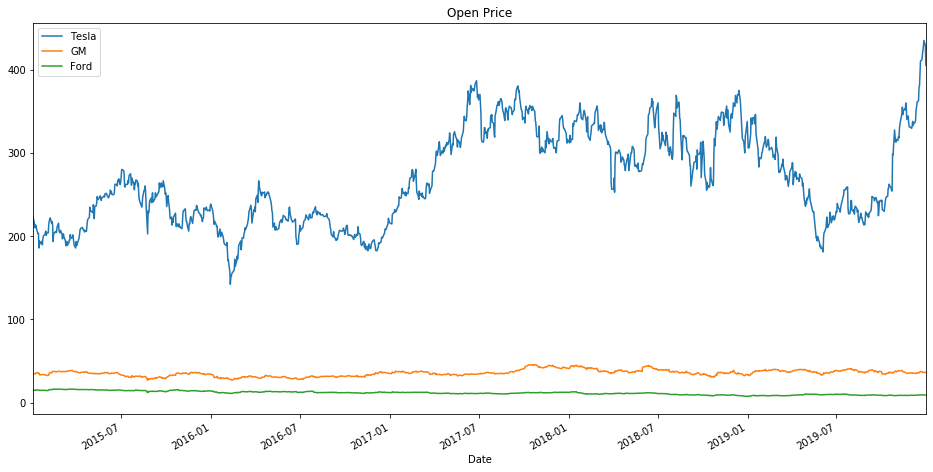

In [42]:
tesla['Open'].plot(label='Tesla',figsize=(16,8), title='Open Price')
gm['Open'].plot(label='GM')
ford['Open'].plot(label='Ford')
plt.legend()

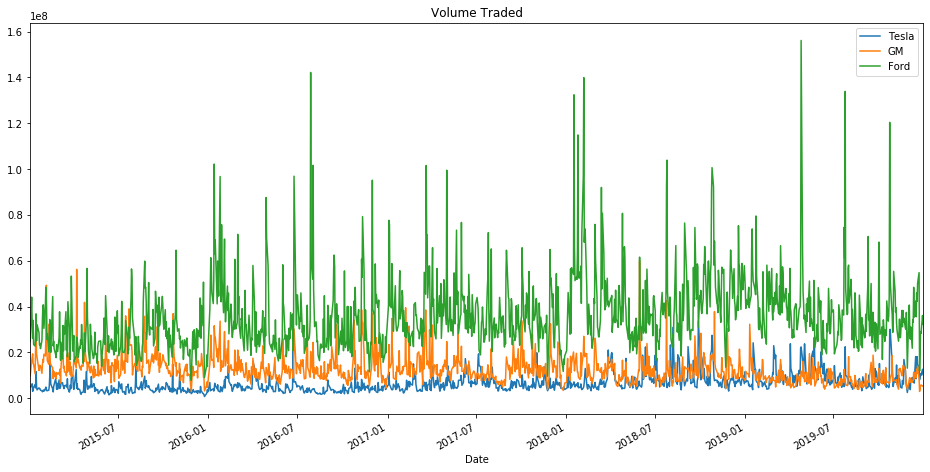

In [43]:
tesla['Volume'].plot(label='Tesla',figsize=(16,8), title='Volume Traded')
gm['Volume'].plot(label='GM')
ford['Volume'].plot(label='Ford')
plt.legend()

In [44]:
ford['Volume'].idxmax()

Timestamp('2019-04-26 00:00:00')

In [45]:
tesla['Total Traded'] = tesla['Open']*tesla['Volume']
ford['Total Traded'] = ford['Open']*ford['Volume']
gm['Total Traded'] = gm['Open']*gm['Volume']

Text(0, 0.5, 'Total Traded')

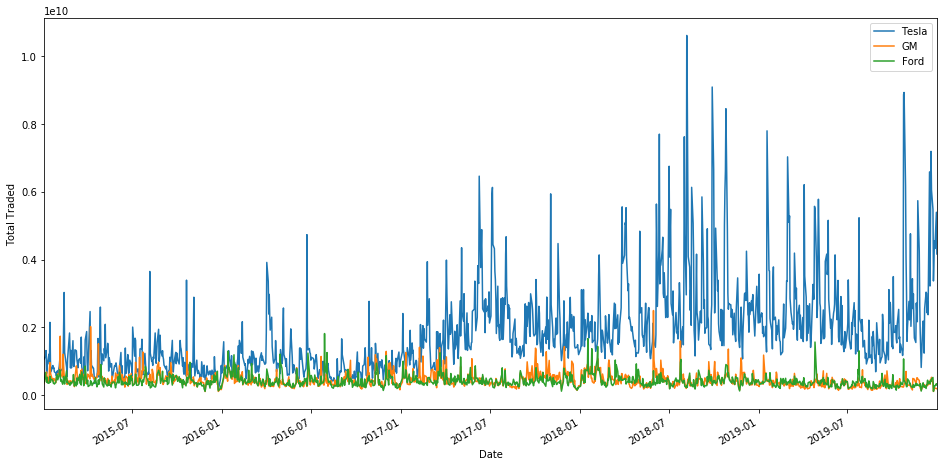

In [46]:
tesla['Total Traded'].plot(label='Tesla',figsize=(16,8))
gm['Total Traded'].plot(label='GM')
ford['Total Traded'].plot(label='Ford')
plt.legend()
plt.ylabel('Total Traded')

In [47]:
tesla['Total Traded'].idxmax()

Timestamp('2018-08-07 00:00:00')

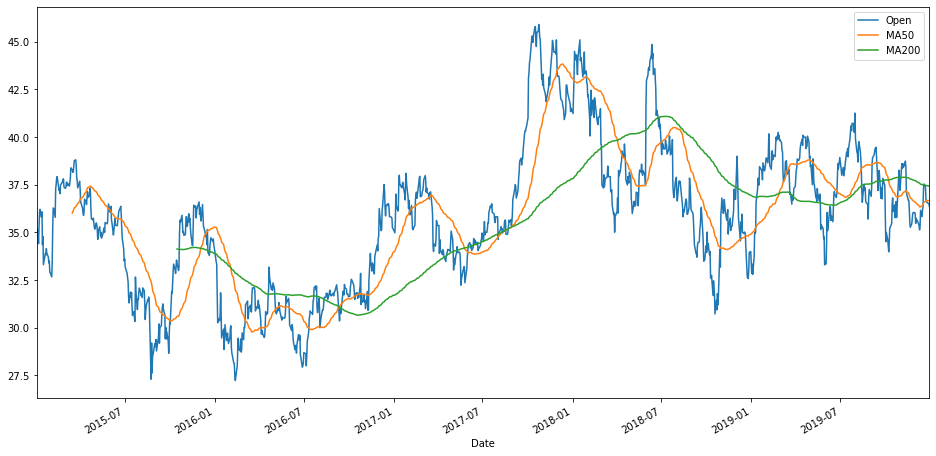

In [48]:
gm['MA50'] = gm['Open'].rolling(50).mean()
gm['MA200'] = gm['Open'].rolling(200).mean()
gm[['Open','MA50','MA200']].plot(label='gm',figsize=(16,8))

In [49]:
from pandas.plotting import scatter_matrix
import pandas as pd

In [50]:
car_comp = pd.concat([tesla['Open'],gm['Open'],ford['Open']],axis = 1)

In [51]:
car_comp.columns = ['Tesla Open','GM Open','Ford Open']

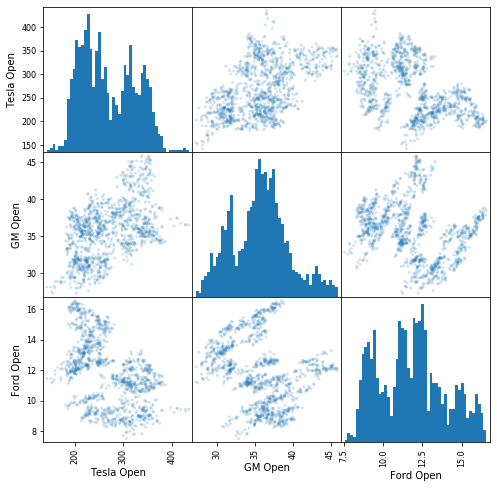

In [52]:
scatter_matrix(car_comp, figsize=(8,8),alpha=0.2,hist_kwds={'bins':50});

In [53]:
tesla['returns'] = (tesla['Close'] / tesla['Close'].shift(1) ) - 1

In [54]:
tesla.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,returns
Date,,,,,,,,
2015-01-02,223.250000,213.259995,222.869995,219.309998,4764400,219.309998,1.061842e+09,NaN
2015-01-05,216.500000,207.160004,214.550003,210.089996,5368500,210.089996,1.151812e+09,-0.042041
2015-01-06,214.199997,204.210007,210.059998,211.279999,6261900,211.279999,1.315375e+09,0.005664
2015-01-07,214.779999,209.779999,213.350006,210.949997,2968400,210.949997,6.333082e+08,-0.001562
2015-01-08,213.800003,210.009995,212.809998,210.619995,3442500,210.619995,7.325984e+08,-0.001564


In [59]:
ford['returns'] = (ford['Close'] / ford['Close'].shift(1) ) - 1

In [60]:
ford.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,returns
Date,,,,,,,,
2015-01-02,15.65,15.18,15.59,15.36,24777900.0,11.675119,3.862875e+08,NaN
2015-01-05,15.13,14.69,15.12,14.76,44079700.0,11.219061,6.664851e+08,-0.039062
2015-01-06,14.90,14.38,14.88,14.62,32981600.0,11.112647,4.907662e+08,-0.009485
2015-01-07,15.09,14.77,14.78,15.04,26065300.0,11.431887,3.852451e+08,0.028728
2015-01-08,15.48,15.23,15.40,15.42,33943400.0,11.720727,5.227283e+08,0.025266


In [61]:
gm['returns'] = (gm['Close'] / gm['Close'].shift(1) ) - 1

In [62]:
gm.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,MA50,MA200,returns
Date,,,,,,,,,,
2015-01-02,35.310001,34.410000,35.270000,34.840000,9756700.0,27.594938,3.441188e+08,NaN,NaN,NaN
2015-01-05,35.250000,34.070000,34.980000,34.330002,16223000.0,27.190994,5.674805e+08,NaN,NaN,-0.014638
2015-01-06,35.220001,34.099998,34.410000,34.849998,17747600.0,27.602859,6.106949e+08,NaN,NaN,0.015147
2015-01-07,35.950001,35.040001,35.230000,35.840000,19319200.0,28.386992,6.806154e+08,NaN,NaN,0.028408
2015-01-08,36.450001,35.799999,36.060001,36.200001,15206600.0,28.672125,5.483500e+08,NaN,NaN,0.010045


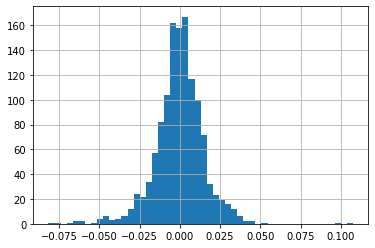

In [63]:
ford['returns'].hist(bins=50)

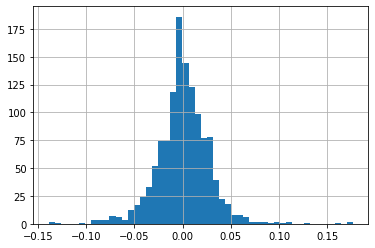

In [64]:
tesla['returns'].hist(bins=50)

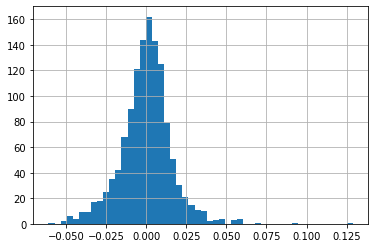

In [65]:
gm['returns'].hist(bins=50)

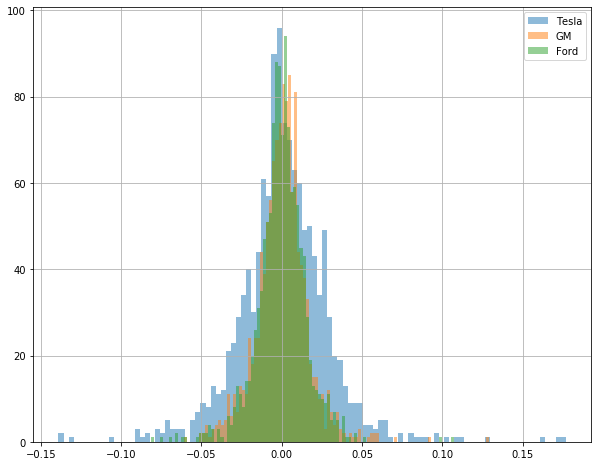

In [66]:
tesla['returns'].hist(bins=100,label='Tesla',figsize=(10,8),alpha=0.5)
gm['returns'].hist(bins=100,label='GM',alpha=0.5)
ford['returns'].hist(bins=100,label='Ford',alpha=0.5)
plt.legend()

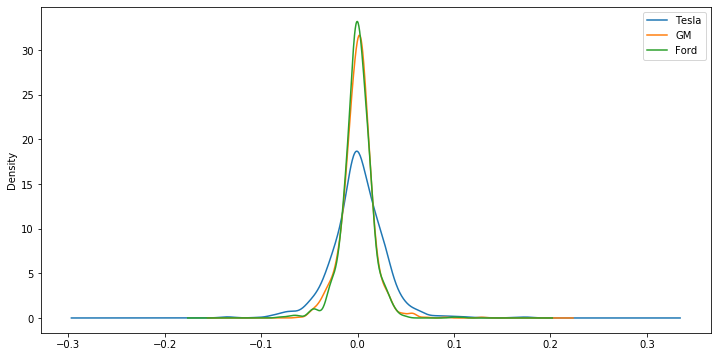

In [67]:
tesla['returns'].plot(kind='kde',label='Tesla',figsize=(12,6))
gm['returns'].plot(kind='kde',label='GM')
ford['returns'].plot(kind='kde',label='Ford')
plt.legend()

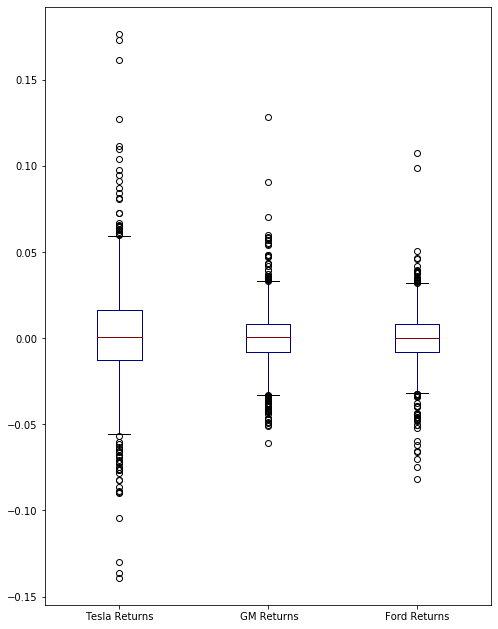

In [68]:
box_df = pd.concat([tesla['returns'],gm['returns'],ford['returns']],axis=1)
box_df.columns = ['Tesla Returns',' GM Returns','Ford Returns']
box_df.plot(kind='box',figsize=(8,11),colormap='jet')

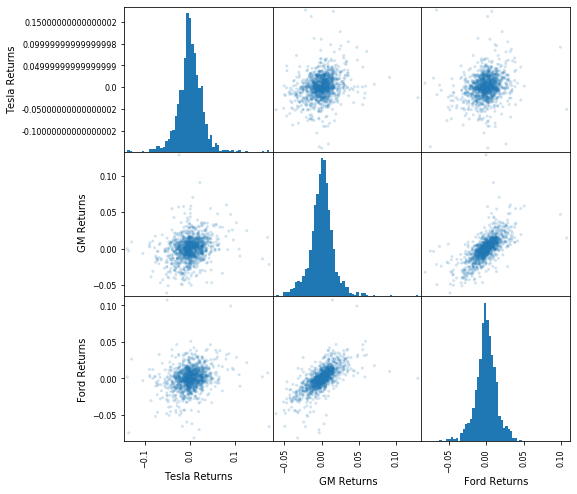

In [73]:
scatter_matrix(box_df,figsize=(8,8),alpha=0.2,hist_kwds={'bins':60});

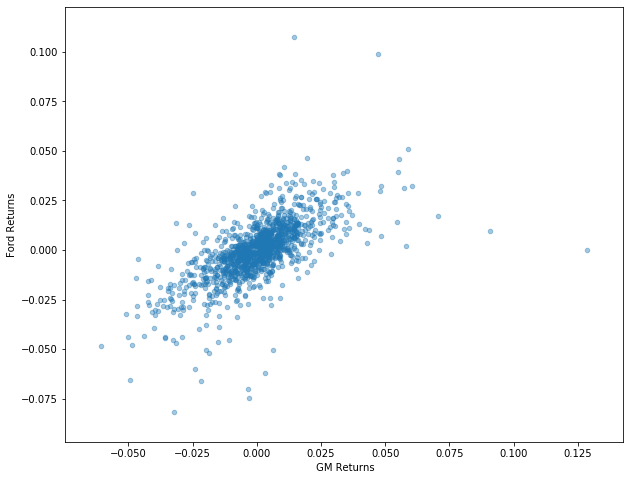

In [74]:
box_df.plot(kind='scatter',x=' GM Returns',y='Ford Returns',alpha=0.4,figsize=(10,8))

In [75]:
tesla['Cumulative Return'] = (1 + tesla['returns']).cumprod()

In [76]:
tesla.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,returns,Cumulative Return
Date,,,,,,,,,
2015-01-02,223.250000,213.259995,222.869995,219.309998,4764400,219.309998,1.061842e+09,NaN,NaN
2015-01-05,216.500000,207.160004,214.550003,210.089996,5368500,210.089996,1.151812e+09,-0.042041,0.957959
2015-01-06,214.199997,204.210007,210.059998,211.279999,6261900,211.279999,1.315375e+09,0.005664,0.963385
2015-01-07,214.779999,209.779999,213.350006,210.949997,2968400,210.949997,6.333082e+08,-0.001562,0.961880
2015-01-08,213.800003,210.009995,212.809998,210.619995,3442500,210.619995,7.325984e+08,-0.001564,0.960376


In [78]:
ford['Cumulative Return'] = (1 + ford['returns']).cumprod()
gm['Cumulative Return'] = (1 + gm['returns']).cumprod()

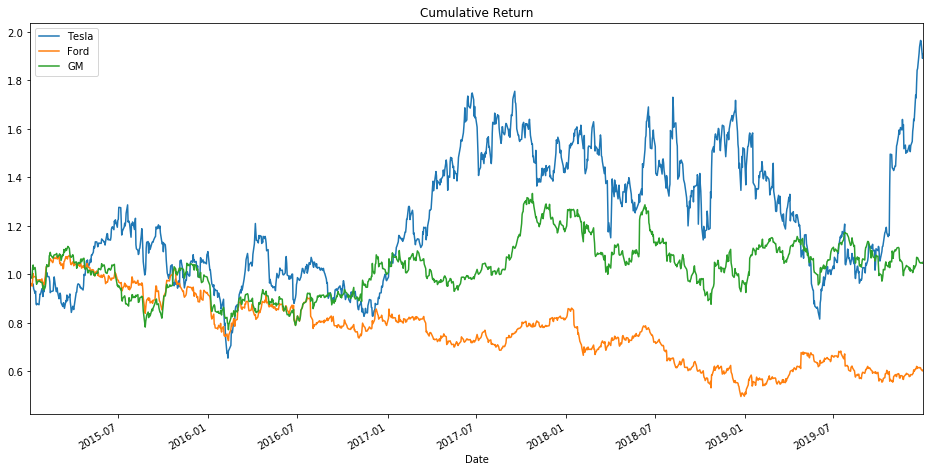

In [79]:
tesla['Cumulative Return'].plot(label='Tesla',figsize=(16,8),title='Cumulative Return')
ford['Cumulative Return'].plot(label='Ford')
gm['Cumulative Return'].plot(label='GM')
plt.legend()